# Analiza podatkov o knjigah

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
knjige = pd.read_csv("goodreads_knjige.csv", index_col="id_knjige")

# Da se podatki prikažejo kot int
knjige["leto_izdaje"] = knjige["leto_izdaje"].astype("Int64")
knjige["st_strani"] = knjige["st_strani"].astype("Int64")

## Uvod
V tem dokumentu bom analizirala knjige na seznamu [Best Books of the 21st Century](https://www.goodreads.com/list/show/7.Best_Books_of_the_21st_Century), torej knjige, izdane v 21. stoletju (med 1. 1. 2001 in 31. 12. 2100), ki so jih uporabniki spletne strani Goodreads uvrstili kot najboljše. Zbrala sem podatke iz prvih 30 strani seznama, torej 3000 knjig. Vrstni red knjige na seznamu je določen z skupno oceno (total score). Ta temelji na več dejavnikih, vključno s številom ljudi, ki so glasovali zanjo, in podanimi ocenami.  
S seznama sem pobrala naslednje podatke o vsaki knjigi: ID, ki ga ustvari Goodreads, naslov, avtor, povprečna ocena, število ocen, število recenzij, leto izdaje, število strani, jezik, število trenutnih bralcev, žanri.  
V spodnji tabeli je prikazanih prvih 10 knjig na tem seznamu - torej po tem kriteriju 10 najboljših knjig 21. stoletja.

In [93]:
knjige.head(10)

,naslov,avtor,povp_ocena,st_ocen,st_recenzij,leto_izdaje,st_strani,jezik,st_trenutnih_bralcev,zanri
id_knjige,,,,,,,,,,
58613224,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4.62,4027023,96378,2007,784,English,52841,"Fantasy, Young Adult, Fiction, Magic, Children..."
2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9649908,253738,2008,374,English,104020,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."
77203,The Kite Runner,Khaled Hosseini,4.35,3418413,110251,2003,371,English,50245,"Fiction, Historical Fiction, Classics, Contemp..."
19063,The Book Thief,Markus Zusak,4.39,2815021,157168,2006,592,English,99785,"Historical Fiction, Fiction, Young Adult, Clas..."
58613345,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.58,3579983,67597,2005,672,English,52192,"Fantasy, Fiction, Young Adult, Magic, Audioboo..."
58613451,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3709438,74754,2003,896,English,85923,"Fantasy, Young Adult, Fiction, Magic, Audioboo..."
4667024,The Help,Kathryn Stockett,4.47,2972171,93428,2009,464,English,24949,"Fiction, Historical Fiction, Book Club, Histor..."
128029,A Thousand Splendid Suns,Khaled Hosseini,4.45,1692128,89730,2007,372,English,40655,"Fiction, Historical Fiction, Book Club, Contem..."
6148028,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.35,4039876,148004,2009,391,English,59250,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."


## Osnovni pregled podatkov


Oglejmo si, v katerem desetletju in je izšlo največ knjig na tem seznamu, katero je leto z največ knjigami na seznamu in kateri je najpogostejši jezik, v katerem so te knjige napisane.

In [94]:
knjige["desetletje"] = (knjige["leto_izdaje"] // 10) * 10

In [95]:
knjige.groupby("desetletje")["naslov"].count()

desetletje
2000    1479
2010    1418
2020      98
Name: naslov, dtype: int64

In [96]:
knjige.groupby("leto_izdaje")["naslov"].count().nlargest(5)

leto_izdaje
2006    271
2007    263
2011    253
2010    225
2012    221
Name: naslov, dtype: int64

In [97]:
top5_jeziki = knjige.groupby("jezik")["naslov"].count().nlargest(5)
top5_jeziki = top5_jeziki.to_frame()  # pretvori Series v DataFrame
top5_jeziki["procent"] = (top5_jeziki["naslov"] / top5_jeziki["naslov"].sum()) * 100

print(top5_jeziki)


                    naslov    procent
jezik                                
English               2922  99.118046
Spanish; Castilian       8   0.271370
French                   7   0.237449
German                   7   0.237449
Arabic                   4   0.135685


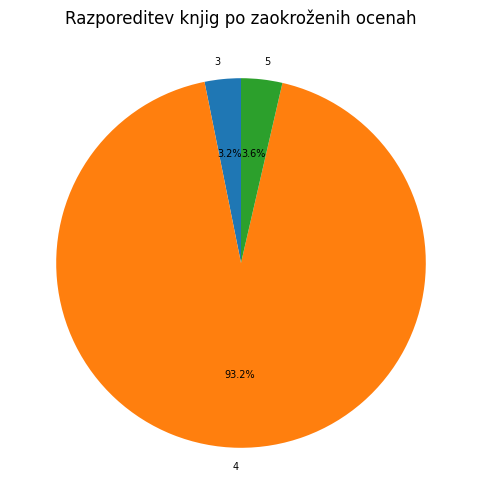

In [98]:
ocene = knjige["povp_ocena"]
zaokrozene_ocene = ocene.apply(round)
st_ocen = zaokrozene_ocene.value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(st_ocen, 
        labels=st_ocen.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize': 7}
        )
# autopct='%1.1f%%' poskrbi, da se na vsakem delu torte pokaže delež v procentih
# %1.1f%% pomeni ena decimalka in znak %
# textprops se uporablja za nastavitve besedila na tortnem diagramu
# uporabimo parameter fontsize, da nastavimo velikost pisave
plt.title("Razporeditev knjig po zaokroženih ocenah")
plt.show()


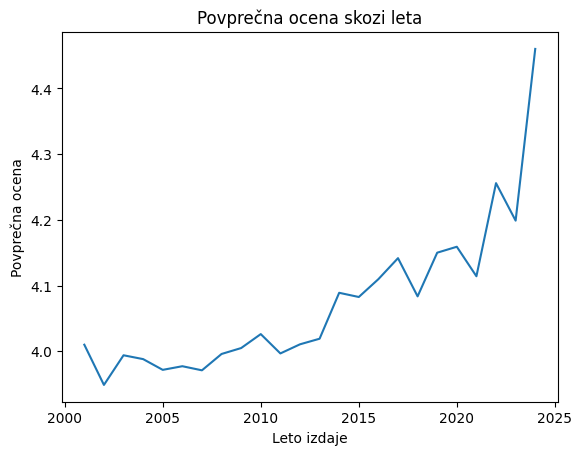

In [99]:
knjige.groupby("leto_izdaje")["povp_ocena"].mean().plot(title="Povprečna ocena skozi leta")
plt.xlabel("Leto izdaje")
plt.ylabel("Povprečna ocena")
plt.show()

Ali so najbolj ocenjene knjige tudi najbolje ocenjene?
Ali so knjige z največ recenzijami najbolje ocenjene?

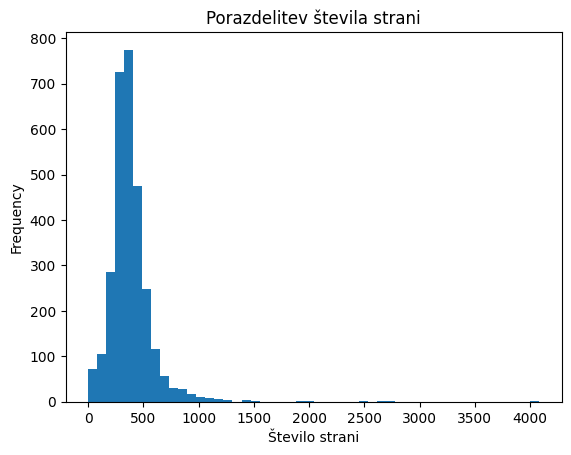

In [100]:
knjige["st_strani"].plot.hist(bins=50, title="Porazdelitev števila strani")
plt.xlabel("Število strani")
plt.show()

Najbolj aktivne knjige

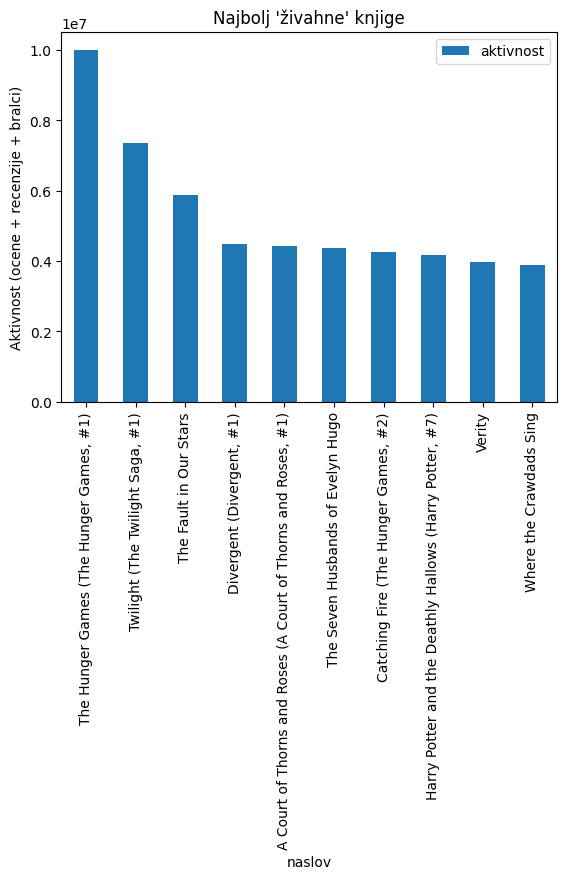

In [101]:
knjige["aktivnost"] = (
    knjige["st_ocen"] + knjige["st_recenzij"] + knjige["st_trenutnih_bralcev"]
)

najbolj_zivahne = knjige.sort_values("aktivnost", ascending=False).head(10)
najbolj_zivahne[["naslov", "avtor", "aktivnost"]]

najbolj_zivahne.plot.bar(x="naslov", y="aktivnost", title="Najbolj 'živahne' knjige")
plt.ylabel("Aktivnost (ocene + recenzije + bralci)")
plt.show()


Ali obstaja povezava med številom ocen in povprečno oceno, torej ali so bolj ocenjene knjige tudi bolje ocenjene.

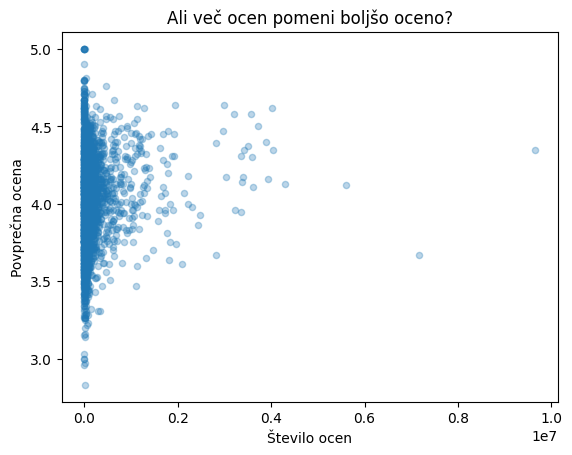

In [102]:
knjige.plot.scatter(x="st_ocen", y="povp_ocena", alpha=0.3, title="Ali več ocen pomeni boljšo oceno?")

plt.xlabel("Število ocen")
plt.ylabel("Povprečna ocena")
plt.show()


In [103]:
knjige[["st_ocen", "povp_ocena"]].corr()

,st_ocen,povp_ocena
st_ocen,1.000000,0.121077
povp_ocena,0.121077,1.000000


C:\Users\Veronika\AppData\Local\Temp\ipykernel_14992\2304105805.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (knjige.groupby("razred_ocen")["povp_ocena"]


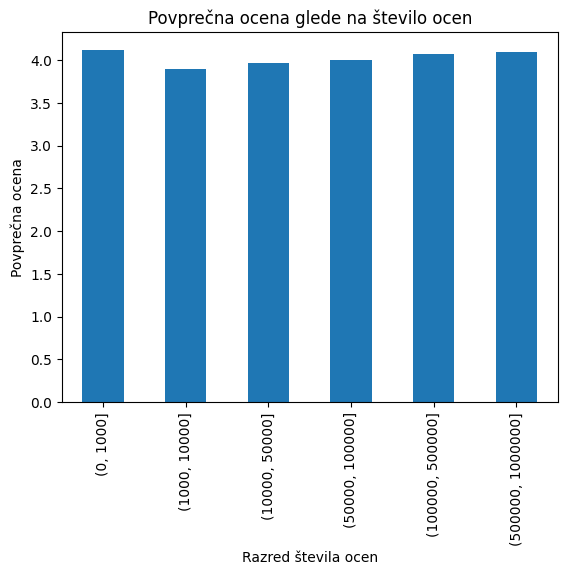

In [104]:
knjige["razred_ocen"] = pd.cut(knjige["st_ocen"], bins=[0, 1000, 10000, 50000, 100000, 500000, 1000000])

(knjige.groupby("razred_ocen")["povp_ocena"]
       .mean()
       .plot.bar(title="Povprečna ocena glede na število ocen"))

plt.xlabel("Razred števila ocen")
plt.ylabel("Povprečna ocena")
plt.show()


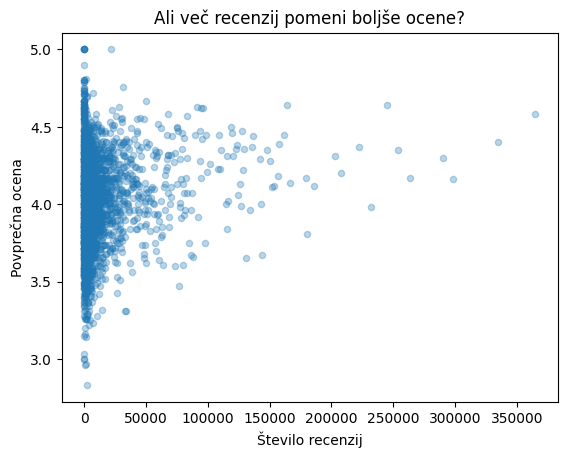

In [105]:
knjige.plot.scatter(x="st_recenzij", y="povp_ocena", alpha=0.3, title="Ali več recenzij pomeni boljše ocene?")

plt.xlabel("Število recenzij")
plt.ylabel("Povprečna ocena")
plt.show()


In [106]:
knjige[["st_recenzij", "povp_ocena"]].corr()


,st_recenzij,povp_ocena
st_recenzij,1.000000,0.146467
povp_ocena,0.146467,1.000000


C:\Users\Veronika\AppData\Local\Temp\ipykernel_14992\3670517850.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (knjige.groupby("razred_recenzij")["povp_ocena"]


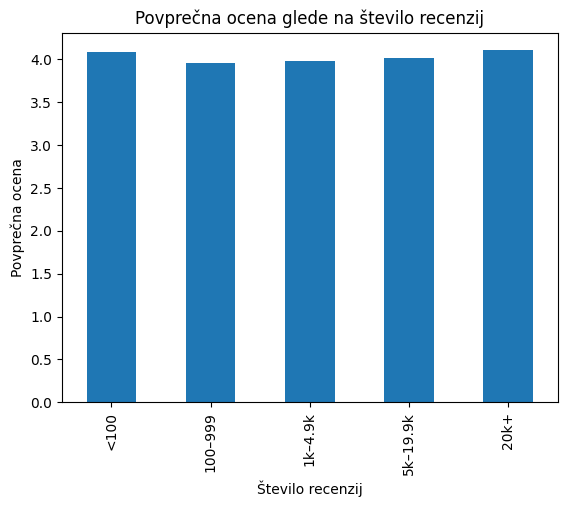

In [107]:
knjige["razred_recenzij"] = pd.cut(
    knjige["st_recenzij"],
    bins=[0, 100, 1000, 5000, 20000, 100000],
    labels=["<100", "100–999", "1k–4.9k", "5k–19.9k", "20k+"]
)

(knjige.groupby("razred_recenzij")["povp_ocena"]
       .mean()
       .plot.bar(title="Povprečna ocena glede na število recenzij"))

plt.xlabel("Število recenzij")
plt.ylabel("Povprečna ocena")
plt.show()
